Titanic Dataset Cleaning & Preprocessing

 1.Import the dataset and explore basic info (nulls, data types)

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"  # If you're using a Kaggle file, replace this URL with your local file path
df = pd.read_csv(url)

# Show the first few rows of the dataset to inspect the data
print("First 5 rows of the dataset:")
print(df.head())

# Get basic information about the dataset
print("\nBasic Information about the dataset:")
print(df.info())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

 2.Handle missing values using mean/median/imputation.

In [8]:
# For numerical columns, use the median to fill missing values
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# For categorical columns, use the mode to fill missing values
categorical_columns = df.select_dtypes(exclude=[np.number]).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Verify that missing values are handled
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
              ..
Cabin_F4       0
Cabin_G6       0
Cabin_T        0
Embarked_Q     0
Embarked_S     0
Length: 1726, dtype: int64


 3.Convert categorical features into numerical using encoding.

In [3]:
# Perform one-hot encoding for categorical variables
df = pd.get_dummies(df, drop_first=True)

# Check the transformed dataset
print("\nDataset after encoding categorical variables:")
print(df.head())


Dataset after encoding categorical variables:
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  \
0            1         0       3  22.0      1      0   7.2500   
1            2         1       1  38.0      1      0  71.2833   
2            3         1       3  26.0      0      0   7.9250   
3            4         1       1  35.0      1      0  53.1000   
4            5         0       3  35.0      0      0   8.0500   

   Name_Abbott, Mr. Rossmore Edward  Name_Abbott, Mrs. Stanton (Rosa Hunt)  \
0                             False                                  False   
1                             False                                  False   
2                             False                                  False   
3                             False                                  False   
4                             False                                  False   

   Name_Abelson, Mr. Samuel  ...  Cabin_F G63  Cabin_F G73  Cabin_F2  \
0                    

 4.Normalize/standardize the numerical features.

In [4]:
from sklearn.preprocessing import StandardScaler

# We select numerical columns for scaling
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Apply standardization (scaling)
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the scaled data
print("\nDataset after scaling numerical features:")
print(df.head())


Dataset after scaling numerical features:
   PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare  \
0    -1.730108 -0.789272  0.827377 -0.565736  0.432793 -0.473674 -0.502445   
1    -1.726220  1.266990 -1.566107  0.663861  0.432793 -0.473674  0.786845   
2    -1.722332  1.266990  0.827377 -0.258337 -0.474545 -0.473674 -0.488854   
3    -1.718444  1.266990 -1.566107  0.433312  0.432793 -0.473674  0.420730   
4    -1.714556 -0.789272  0.827377  0.433312 -0.474545 -0.473674 -0.486337   

   Name_Abbott, Mr. Rossmore Edward  Name_Abbott, Mrs. Stanton (Rosa Hunt)  \
0                             False                                  False   
1                             False                                  False   
2                             False                                  False   
3                             False                                  False   
4                             False                                  False   

   Name_Abelson, Mr

 5.Visualize outliers using boxplots and remove them.

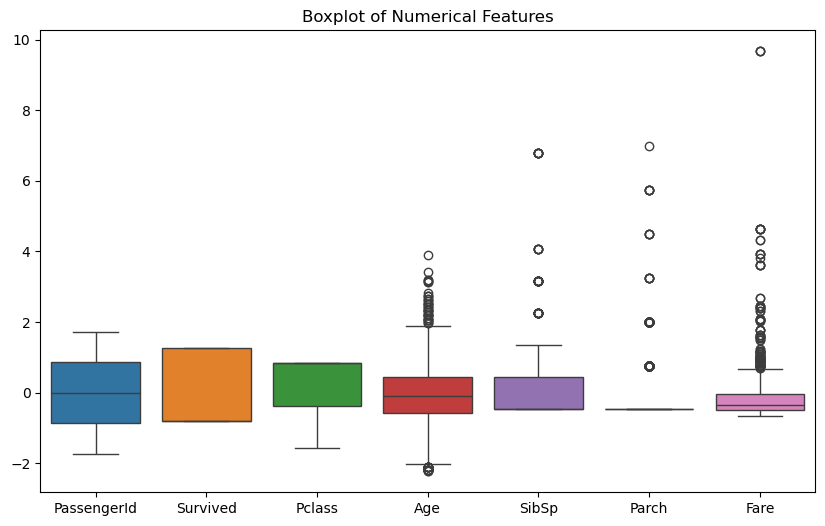

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplot of Numerical Features")
plt.show()

# Optionally, remove outliers
# Calculate IQR for each feature
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Remove rows where any numerical feature is outside of the 1.5*IQR range
df_no_outliers = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the data after removing outliers
print("\nDataset after removing outliers:")
print(df_no_outliers.shape)